<a href="https://colab.research.google.com/github/abubaker909/Stock_Price_Predictor_Using_KNN/blob/main/Stock_Price_Predictor_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
!pip install quandl
import quandl

In [45]:
data = quandl.get("WIKI/GOOGL")

In [46]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


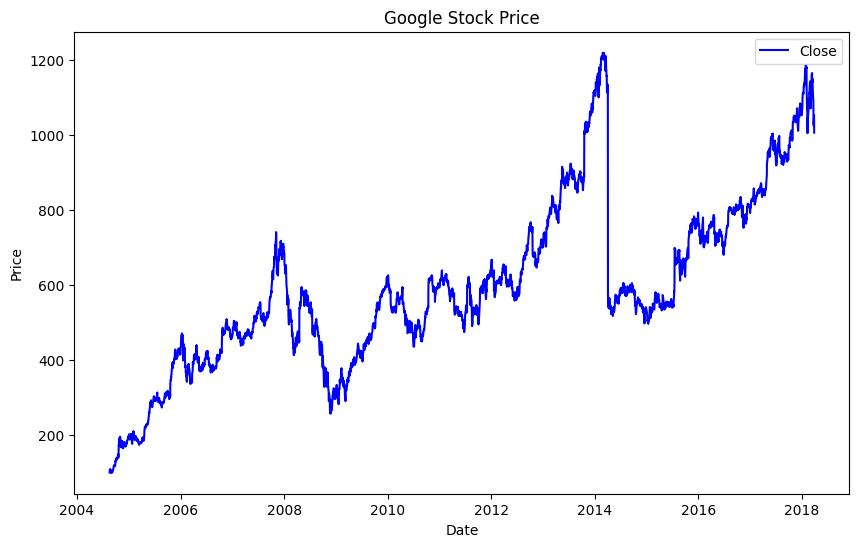

In [47]:
plt.figure(figsize=(10, 6))

plt.plot(data['Close'], label='Close', linestyle='-', color='blue')

plt.title('Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [52]:
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=10).std()
data = data.dropna()

X = data[['open-close', 'high-low', 'MA10', 'MA50', 'Volatility']]
Y = data['Close']

In [53]:
X = data[['open-close', 'high-low']]
X.head()

,open-close,high-low
Date,,
2004-10-28,-6.67,8.79
2004-10-29,8.23,9.35
2004-11-01,-2.53,6.40
2004-11-02,3.86,5.91
2004-11-03,6.52,10.85


In [54]:
Y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
Y

array([-1,  1, -1, ...,  1, -1, -1])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scaling the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=44)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

model.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print('Best Params: ', model.best_params_)
print('Accuracy Train: ', accuracy_train)
print('Accuracy Test: ', accuracy_test)

Best Params:  {'n_neighbors': 7}
Accuracy Train:  0.6653496641643619
Accuracy Test:  0.4976303317535545


In [57]:
predication_classification = model.predict(X_test)

In [58]:
actual_predicated_data = pd.DataFrame({'Actual': Y_test, 'Predicted': predication_classification})
actual_predicated_data.head(10)

,Actual,Predicted
0,1,1
1,-1,-1
2,-1,1
3,-1,-1
4,1,1
5,-1,1
6,1,-1
7,-1,1
8,1,1
9,-1,1


In [59]:
Y = data['Close']

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Scaling the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X_scaled, Y, test_size=0.25, random_state=44)

# Defining the parameter grid
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# Initializing KNeighborsRegressor
knn_reg = KNeighborsRegressor()

# Performing GridSearchCV
model = GridSearchCV(knn_reg, params, cv=5)

# Fitting the model
model.fit(X_train_reg, Y_train_reg)

# Making predictions
train_predictions = model.predict(X_train_reg)
test_predictions = model.predict(X_test_reg)

# Evaluating the model
mse_train = mean_squared_error(Y_train_reg, train_predictions)
mse_test = mean_squared_error(Y_test_reg, test_predictions)
r2_train = r2_score(Y_train_reg, train_predictions)
r2_test = r2_score(Y_test_reg, test_predictions)

print('Best Params: ', model.best_params_)
print('Mean Squared Error Train: ', mse_train)
print('Mean Squared Error Test: ', mse_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)


Best Params:  {'n_neighbors': 15}
Mean Squared Error Train:  40632.93419765014
Mean Squared Error Test:  44880.75306756465
R2 Score Train:  0.175045539619058
R2 Score Test:  0.06518318324461814


In [62]:
predications = model.predict(X_test_reg)
print(predications)

[540.07       561.62333333 519.75733333 543.43133333 550.09333333
 652.30066667 670.136      562.79666667 658.634      646.632
 447.00153333 759.88333333 601.60333333 509.81866667 665.24777333
 539.106      578.69733333 663.58666667 673.52066667 529.634
 656.09166667 702.194      717.288      527.68733333 649.64133333
 636.846      704.72066667 470.944      558.99200667 713.25093333
 628.20119333 599.23688    647.635      585.73133333 544.622
 660.38226667 534.909      728.36866667 517.685      402.50666667
 552.00866667 651.12066667 736.4046     531.196      637.048
 474.746      611.92266667 709.87333333 348.66866667 659.30266667
 642.21733333 389.62759333 798.34653333 774.99133333 586.45233333
 538.428      760.55133333 617.24466667 515.33133333 677.69
 690.58733333 556.34333333 557.62       579.464      662.47346667
 612.72466667 570.90973333 587.04866667 749.58866667 539.484
 585.43333333 649.0734     507.828      608.092      557.58966667
 642.84666667 564.38433333 662.37       6

In [63]:
rms = np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(predications)),2)))
rms

611.4867501571441

In [64]:
valid = pd.DataFrame({'Actual': Y_test_reg, 'Predicted': predications})
valid.head(10)

,Actual,Predicted
Date,,
2005-06-24,297.25,540.070000
2017-11-10,1044.15,561.623333
2011-09-30,515.04,519.757333
2013-04-11,790.39,543.431333
2011-04-28,537.97,550.093333
2011-08-03,601.17,652.300667
2016-07-05,704.89,670.136000
2017-10-06,993.64,562.796667
2008-12-09,305.97,658.634000


In [65]:
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=10).std()
data = data.dropna()

X = data[['open-close', 'high-low', 'MA10', 'MA50', 'Volatility']]
Y = data['Close']

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_scaled, Y, test_size=0.25, random_state=44)


# Define the parameter grid for RandomForest
params_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf = RandomForestRegressor()

# Perform GridSearchCV
model_rf = GridSearchCV(rf, params_rf, cv=5)
model_rf.fit(X_train_rf, Y_train_rf)

# Evaluate the model
train_predictions_rf = model_rf.predict(X_train_rf)
test_predictions_rf = model_rf.predict(X_test_rf)

mse_train_rf = mean_squared_error(Y_train_rf, train_predictions_rf)
mse_test_rf = mean_squared_error(Y_test_rf, test_predictions_rf)
r2_train_rf = r2_score(Y_train_rf, train_predictions_rf)
r2_test_rf = r2_score(Y_test_rf, test_predictions_rf)

print('Random Forest Best Params: ', model_rf.best_params_)
print('Random Forest Mean Squared Error Train: ', mse_train_rf)
print('Random Forest Mean Squared Error Test: ', mse_test_rf)
print('Random Forest R2 Score Train: ', r2_train_rf)
print('Random Forest R2 Score Test: ', r2_test_rf)


Random Forest Best Params:  {'max_depth': 20, 'n_estimators': 200}
Random Forest Mean Squared Error Train:  51.18504120349323
Random Forest Mean Squared Error Test:  244.95917018891103
Random Forest R2 Score Train:  0.9989421329085185
Random Forest R2 Score Test:  0.9942852997609254


In [67]:
print(test_predictions_rf)

[ 383.263175    595.04115     523.99981     451.1505905   687.7167065
  305.841355    460.12215367  514.127225    595.516392    803.68403167
  480.79378326  762.17444     657.1995      555.23867933  478.59492
 1027.4388      948.84495     550.3741      349.75795    1059.90185
  442.121485    462.04914667  382.31475     630.5223      311.464895
  517.99991261  435.7179545   789.73275    1113.074       848.19143
  553.83992033  565.97150825  805.89145667  536.32939757  421.0403415
  657.22065     665.488166    486.40161917  521.916251    704.0338415
  694.733716    501.15861667  577.79211667  560.18799458  430.173142
  592.01794083  586.42863     725.2180235   574.4016      482.827595
  672.51125     476.642368    826.91198     194.78605     623.4575425
  549.90415416  940.5216      413.7900505   588.96504746  686.5808975
  557.2631495  1122.7091      363.859       723.016799    481.20037625
  778.56812     576.565836    594.39185     593.63104156  588.96445714
  639.04555     352.62505 

In [68]:
valid_rf = pd.DataFrame({'Actual': Y_test_rf, 'Predicted': test_predictions_rf})
valid_rf.head(10)

,Actual,Predicted
Date,,
2006-05-24,381.25,383.263175
2011-11-28,588.19,595.041150
2014-12-12,521.51,523.999810
2010-07-07,450.20,451.150590
2007-12-12,699.35,687.716706
2008-12-15,310.67,305.841355
2009-08-26,468.00,460.122154
2007-06-21,514.11,514.127225
2011-07-21,606.99,595.516392
